<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasyfikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
data = 'data.csv'

df = pd.read_csv(data, sep=',')


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [var for var in df.columns if df[var].dtype=='object']

print('Dane tekstowe zawierają kolumny :\n\n', categorical)

numerical = [var for var in df.columns if df[var].dtype=='int64']

print('\nDane liczbowe zawierają kolumny :\n\n', numerical)


Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
# sprawdzenie brakujących danych w kolumnach zawierających dane tekstowe
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Na podstawie powyższej instrukcji i wyniku przez nią zwróconego dowiedzieliśmy się, że nie ma żadnych brakujących danych.

In [5]:
# sprawdzenie częstości występowania poszczególnych wartości w danych tekstowych
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Po wykonaniu powyższej instrukcji można zauważyć, że jest kilka kolumn, które zawierają brakujące dane. Ogólnie w pythonie takie wartości są oznaczane jako NaN, co można łatwo wykryć instrukcją df.isnull().sum(), którą zresztą użyłem wyżej. W tym przypadku jednak brakujące dane zostały oznaczone jako ?, czego python tą instrukcją nie był w stanie wykryć. W związku z tym, muszę zamienić ? na Nan.

In [6]:
# zamiana wartości oznaczonych jako '?' na 'NaN'

df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [7]:
# ponowne sprawdzenie brakujących danych w poszczególnych kolumnach

df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Tym razem widać już, że python wykrył brakujące dane oznaczone jako NaN i zwrócił nam ich liczbę

In [8]:
# następnym etapem będzie sprawdzenie występowania brakujących danych w danych liczbowych
# moje działania będą analogiczne do tych dla danych tekstowych, jednak będzie jedna różnica
# dla danych liczbowych niemożliwe będzie występowanie '?', ponieważ są one typu int64

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Jak widać, w żadnej kolumnie nie występują brakujące dane, ponieważ nie ma wartości 'Nan', a tak jak wspomniałem wcześniej, tutaj nie mogą występować wartości nieliczbowe ze względu na typ

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [9]:
# podział X i y na zbiory uczące i testowe

X = df.drop(['income'], axis=1)

y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# uzupełnienie brakujących wartości najczęściej występującą wartością w danej kolumnie
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)
    

C:\Users\adria\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
# ostateczne sprawdzenie występowania brakujących wartości w zbiorach testowych i uczących
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [11]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Powyższe rezultaty potwierdzają, że brakujące dane zostały zastąpione poprawnie. Teraz można przystąpić do dalszych działań.

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [12]:
import category_encoders as ce

encoder = ce.OneHotEncoder(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test.shape

(9769, 105)

Widać, że po dokonanych zamianach i działaniach, z początkowych 14 kolumn, teraz otrzymaliśmy ich 105.

Zbiory uczące i testowe są teraz gotowe do budowania modelu. Jednak aby dokonać klasyfikacji danych używając GaussianNB, powinniśmy 'zmapować' wszystkie kolumny do tej samej skali.

In [14]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train_2 = pd.DataFrame(X_train, columns=[cols])

X_test_2 = pd.DataFrame(X_test, columns=[cols])

X_train_2.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train_2, y_train)

y_pred = gnb.predict(X_test_2)

print("Predykcja:")
print(y_pred)

print("\nDokładność modelu:")
print(accuracy_score(y_test, y_pred))

Predykcja:
[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']

Dokładność modelu:
0.8082710615211383


Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


<AxesSubplot:>

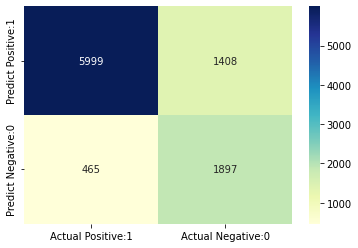

In [16]:
# macierz błędu, jej wykres i interpretacja
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Na podstawie wykresu macierzy błędu bardzo łatwo można ją zinterpretować. Widać, że najwięcej, bo aż 5999 jest wartości TP, czyli takich kiedy model słusznie i poprawnie rozpoznał należność do klasy. Innymi poprawnie rozpoznanymi wartościami są wartości TN, jest ich 1897 i oznaczają one poprawne sklasyfikowanie braku należności do klasy. Kolejne, jeśli chodzi o liczność są wartości FP, czyli rozpoznane jako należne pomimo braku występowania należności. Jest ich 1408. W macierzy występuje także 465 wartości FN, czyli rozpoznanych jako nienależące do klasy, choć w rzeczywistości ta należność występuje.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

KOLUMNA RACE

C:\Users\adria\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Predykcja:
[' Black' ' White' ' White' ... ' White' ' White' ' Black']

Dokładność modelu:
0.6721261132152728

Confusion matrix

 [[   6    0   27    2   45]
 [   5  163   40    5  105]
 [  20    4  476    7  404]
 [   1    3   14   21   33]
 [ 164   50 2036  238 5900]]


<AxesSubplot:>

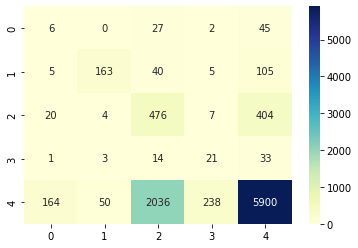

In [22]:
# odczytanie danych wejściowych
df = pd.read_csv(data, sep=',')

# zamiana wartości oznaczonych jako '?' na 'NaN'
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

# podział X i y na zbiory uczące i testowe
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# uzupełnienie brakujących wartości najczęściej występującą wartością w danej kolumnie
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

# proces kodowania zmiennych tekstowych z pozostałych kategorii na wartości liczbowe
encoder = ce.OneHotEncoder(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# mapowanie wszystkich kolumn do tej samej skali
cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_2 = pd.DataFrame(X_train, columns=[cols])
X_test_2 = pd.DataFrame(X_test, columns=[cols])


# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train_2, y_train)

y_pred = gnb.predict(X_test_2)

print("Predykcja:")
print(y_pred)

print("\nDokładność modelu:")
print(accuracy_score(y_test, y_pred))

# macierz błędu, jej wykres i interpretacja
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion matrix\n\n', cm)

#print('\nTrue Positives(TP) = ', cm[0,0])
#print('\nTrue Negatives(TN) = ', cm[1,1])
#print('\nFalse Positives(FP) = ', cm[0,1])
#print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

KOLUMNA NATIVE_COUNTRY

C:\Users\adria\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Predykcja:
[' Outlying-US(Guam-USVI-etc)' ' Greece' ' Guatemala' ... ' Peru'
 ' Yugoslavia' ' Yugoslavia']

Dokładność modelu:
0.03147800708776319

Confusion matrix

 [[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    2    0    8]
 [   0    0    2 ...    0    0    0]
 ...
 [   1    0    1 ...  260    2 2977]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]]


<AxesSubplot:>

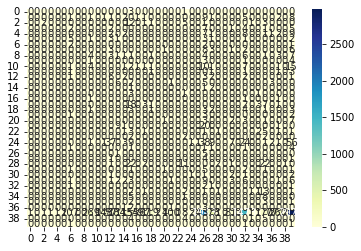

In [26]:
# odczytanie danych wejściowych
df = pd.read_csv(data, sep=',')

# zamiana wartości oznaczonych jako '?' na 'NaN'
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

# usunięcie wierszy posiadających wartość NaN w kolumnie native_country
df.dropna(subset=['native_country'], inplace=True)

# podział X i y na zbiory uczące i testowe
X = df.drop(['native_country'], axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# uzupełnienie brakujących wartości najczęściej występującą wartością w danej kolumnie
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)

# proces kodowania zmiennych tekstowych z pozostałych kategorii na wartości liczbowe
encoder = ce.OneHotEncoder(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# mapowanie wszystkich kolumn do tej samej skali
cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_2 = pd.DataFrame(X_train, columns=[cols])
X_test_2 = pd.DataFrame(X_test, columns=[cols])


# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train_2, y_train)

y_pred = gnb.predict(X_test_2)

print("Predykcja:")
print(y_pred)

print("\nDokładność modelu:")
print(accuracy_score(y_test, y_pred))

# macierz błędu, jej wykres i interpretacja
cm = confusion_matrix(y_test, y_pred)

print('\nConfusion matrix\n\n', cm)

#print('\nTrue Positives(TP) = ', cm[0,0])
#print('\nTrue Negatives(TN) = ', cm[1,1])
#print('\nFalse Positives(FP) = ', cm[0,1])
#print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Jak widać po powyższych wywołaniach kodu, macierzach i wykresach, im więcej różnych danych znajdowało się w danej kolumnie, tym gorsze wyniki były otrzymywane. W pierwszym przypadku, gdzie możliwe do osiągnięcia były tylko dwa przypadki, model był bardzo dokładny. Gorzej z tą dokładnością było w przypadku kolumny 'race', gdzie były możliwe pięć wartości. Jednak wynik 67% przy takiej ilości dalej jest dość dobry. Zgodnie z oczekiwaniami, zdecydowanie najgorszy wynik dokładności, bo raptem 3%, został osiągnięty dla ostatniej przebadanej kolumny. W tym przypadku zarówno macierz jak i jej wykres są bardzo słabo czytelne ze względu właśnie na za dużą ilość danych.